## Diabetes Diagnosis
### >This project aims at building a model that is able to predict whether a person has diabetes or not, using features such as blood sugar levels, body mass index (BMI), age, family history, and other relevant health indicators.

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(pd.__version__)

2.2.2


In [4]:
df = pd.read_csv('Diabetes_prediction.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'diagnosis'],
      dtype='object')

### Pregnancies: Number of pregnancies the individual has had.

In [9]:
print(f"The maximum no of pregnancies individual has had is {df.pregnancies.max()}")
print(f"The minimum no of pregnancies individual has had is {df.pregnancies.min()}")

The maximum no of pregnancies individual has had is 8
The minimum no of pregnancies individual has had is 0


<Axes: xlabel='pregnancies', ylabel='Count'>

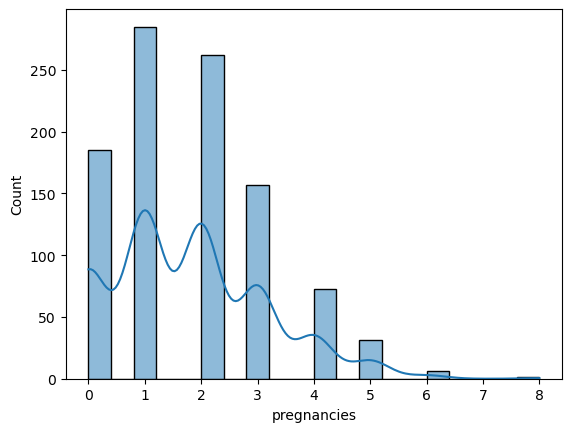

In [10]:
sns.histplot(df.pregnancies,kde=True)
#most individual have had 1 pregnancy and least have had 7 pregnancies

In [11]:
df.drop('pregnancies',axis=1,inplace=True)

### Glucose: Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test

In [12]:
print(f"The maximum plasma glucose concentration is {df.glucose.max()}")
print(f"The minimum plasma glucose concentration is {df.glucose.min()}")

The maximum plasma glucose concentration is 161.23893930812437
The minimum plasma glucose concentration is 30.571402161232346


<Axes: xlabel='glucose', ylabel='Count'>

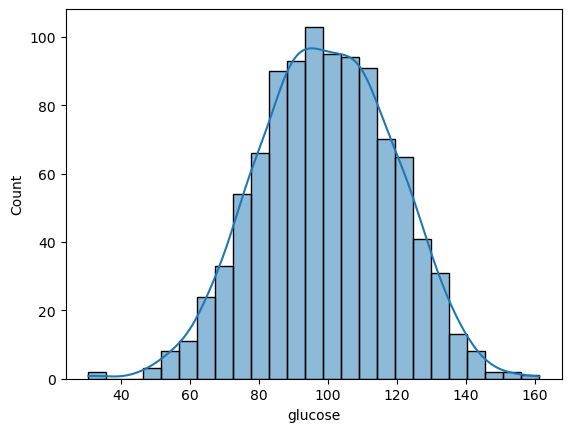

In [13]:
sns.histplot(df.glucose,kde=True)
# plasma glucose concentration is a normal distribution, and most individuals have between 90 - 110(mg/dl) concentration

### BloodPressure: Diastolic blood pressure (mm Hg)

In [14]:
print(f"Max blood pressure: {df.bloodpressure.max()}")
print(f"Min blood pressure: {df.bloodpressure.min()}")

Max blood pressure: 110.72371460214974
Min blood pressure: 31.40148707615002


<Axes: xlabel='bloodpressure', ylabel='Count'>

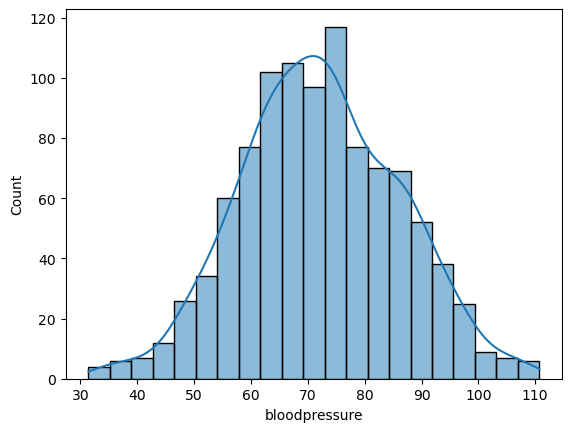

In [15]:
sns.histplot(df.bloodpressure,kde=True)
#blood pressure level is a normal distribution, and most individuals have between 60-75(mm Hg) blood pressure level

<Axes: xlabel='glucose', ylabel='bloodpressure'>

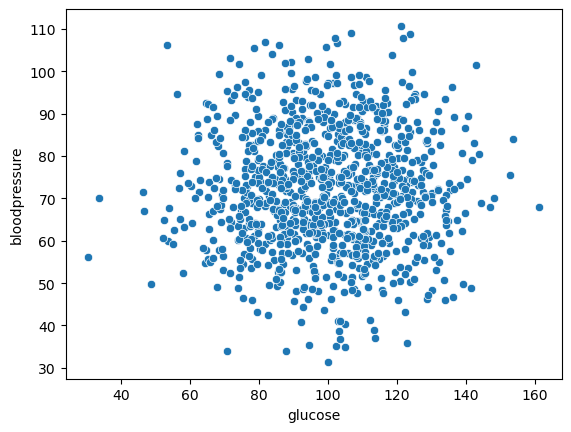

In [16]:
sns.scatterplot(x = df.glucose,y = df.bloodpressure)

### SkinThickness: Thickness of skinfold (mm) at the triceps.

In [17]:
print(f" Max len of thickness of skin at triceps is: {df.skinthickness.max()}")
print(f" Min len of thickness of skin at triceps is: {df.skinthickness.min()}")

 Max len of thickness of skin at triceps is: 26.917654051162653
 Min len of thickness of skin at triceps is: 19.369987239303853


<Axes: xlabel='skinthickness', ylabel='Count'>

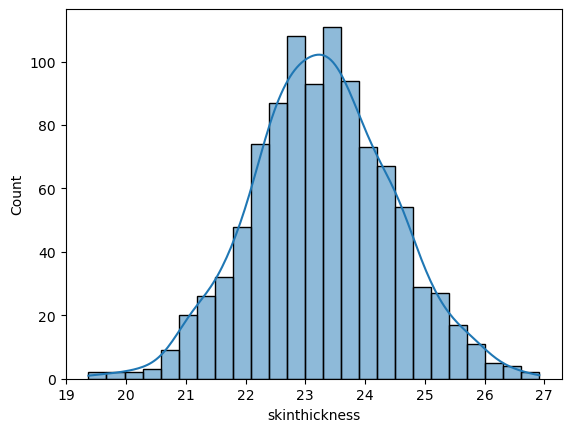

In [18]:
sns.histplot(df.skinthickness,kde=True)
#skinthickness is a normal distribution, and most individuals have between 22-24(mm) skin thickness

### Insulin:2-Hour serum insulin (mu U/ml).

In [19]:
print(f" Max 2Hr serum insulin level is: {df.insulin.max()}")
print(f" Min 2Hr serum insulin level is: {df.insulin.min()}")

 Max 2Hr serum insulin level is: 317.701851723486
 Min 2Hr serum insulin level is: -165.3100326101158


<Axes: xlabel='insulin', ylabel='Count'>

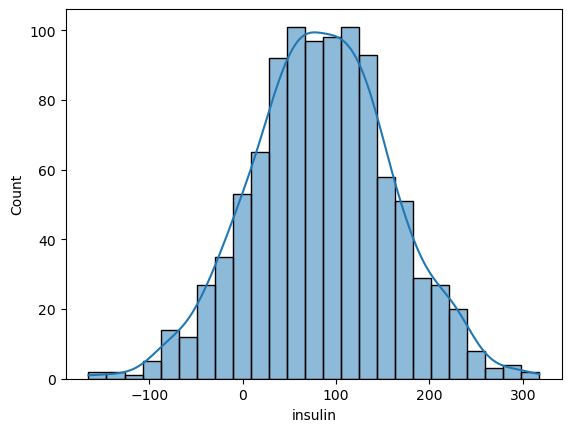

In [20]:
sns.histplot(df.insulin,kde=True)

### BMI: body mass index

In [21]:
print(f" Max BMI is: {df.bmi.max()}")
print(f" Min BMI is: {df.bmi.min()}")

 Max BMI is: 36.324597869685
 Min BMI is: 13.548817852644664


<Axes: xlabel='bmi', ylabel='Count'>

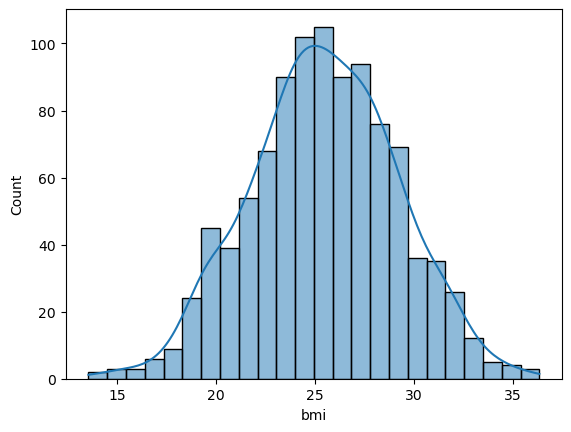

In [22]:
sns.histplot(df.bmi,kde=True)
#most individuals have between 23-28 BMI

### Diabetes pedigree function: which represents the likelihood of diabetes based on family history

In [23]:
print(f" Highest diabetes probability function is: {df.diabetespedigreefunction.max()}")
print(f" Lowest diabetes probability function is: {df.diabetespedigreefunction.min()}")

 Highest diabetes probability function is: 0.7996536327959616
 Lowest diabetes probability function is: 0.1000369788526077


<Axes: xlabel='diabetespedigreefunction', ylabel='Count'>

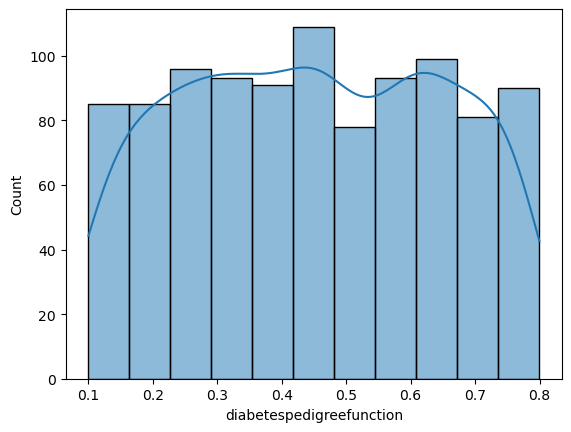

In [24]:
sns.histplot(df.diabetespedigreefunction,kde=True)
#most individuals have between 0.4-0.5 probability

### Age: Age of the individual (years).

In [25]:
print(f"Max age is {df.age.max()}")
print(f"Min age is {df.age.min()}")
# the minimum age can't be negative, so it seems to have outliers

Max age is 90.5737824472806
Min age is -0.979803578151646


<Axes: xlabel='age', ylabel='Count'>

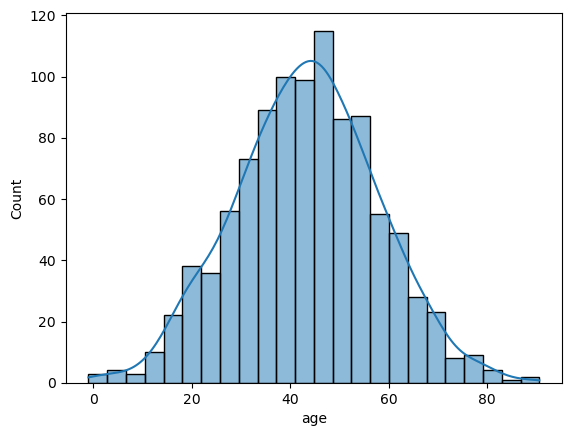

In [26]:
sns.histplot(df.age,kde=True)

### Diagnosis: Binary label indicating whether the individual has diabetes (1) or not (0).

In [27]:
df.diagnosis.value_counts()

diagnosis
0    694
1    306
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

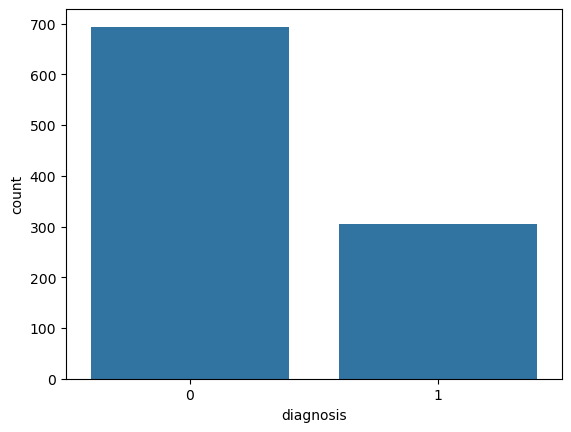

In [28]:
sns.countplot(x = df.diagnosis)

### Let's remove outliers

In [29]:
columns = ['glucose', 'bloodpressure', 'skinthickness', 'insulin','bmi', 'diabetespedigreefunction', 'age']
print(f"Shape of data with outliers: {df.shape}")
for col in columns:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
print(f"Shape of data without outliers: {df.shape}")

Shape of data with outliers: (1000, 8)
Shape of data without outliers: (767, 8)


In [30]:
df.describe()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diagnosis
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,99.742519,72.170153,23.270551,83.834155,25.474011,0.449638,43.389739,0.308996
std,17.465182,12.245827,0.997146,65.348409,3.336309,0.200324,12.665023,0.462381
min,60.714150,45.725938,20.980052,-66.362086,18.133938,0.100037,15.399262,0.000000
25%,86.792107,63.447240,22.548877,37.485743,23.091071,0.277751,34.355392,0.000000
50%,99.105136,71.777150,23.282376,82.991468,25.455090,0.447323,43.552448,0.000000
75%,112.526966,80.749327,23.971816,130.767821,27.969079,0.623669,52.568583,1.000000
max,137.292501,99.899657,25.621266,232.459858,32.790210,0.799654,71.576667,1.000000


### The insulin level is noramlly in the range of 16-166 mIU/L

In [31]:
df = df[(df.insulin > 15) & (df.insulin < 167)]

In [32]:
df.shape

(557, 8)

<Axes: xlabel='diagnosis', ylabel='count'>

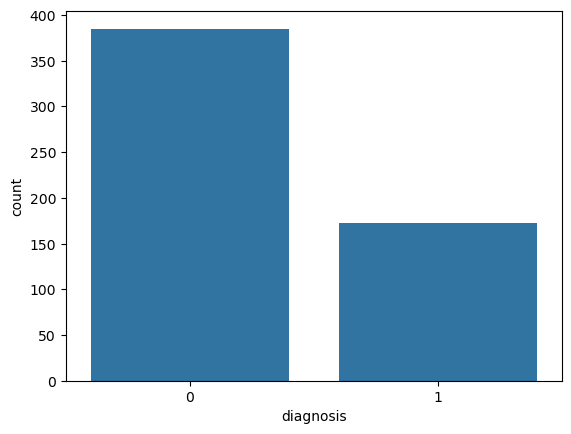

In [33]:
sns.countplot(x = df.diagnosis)

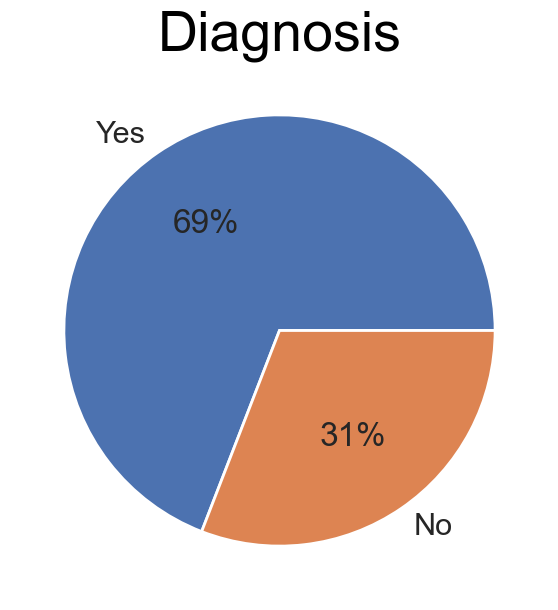

In [34]:
labels=['Yes','No']
values=df['diagnosis'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(7,7))
plt.title('Diagnosis', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

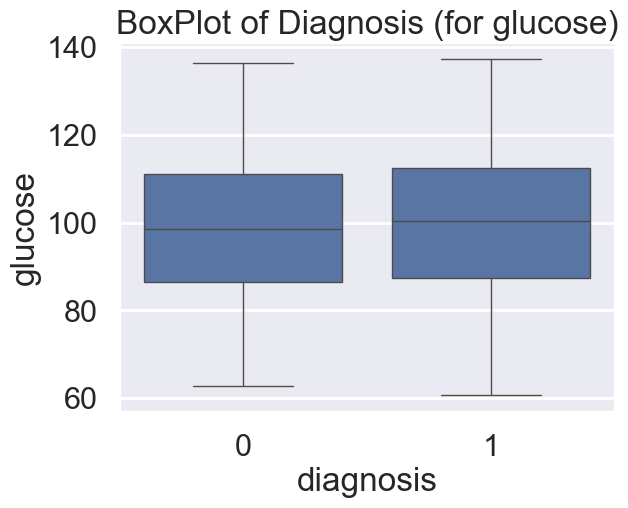

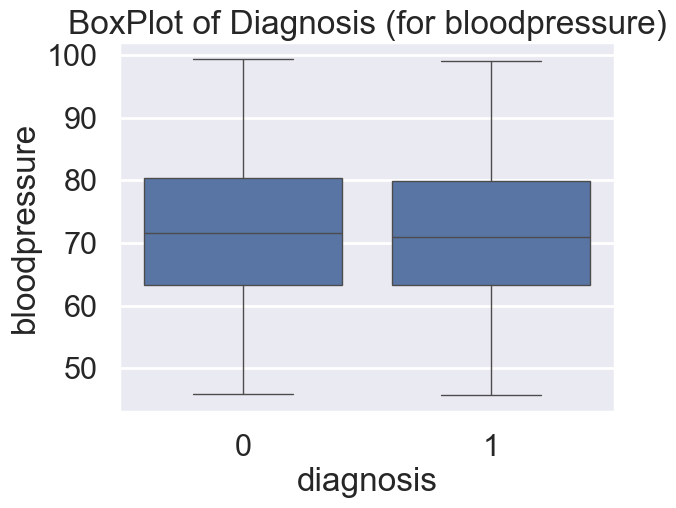

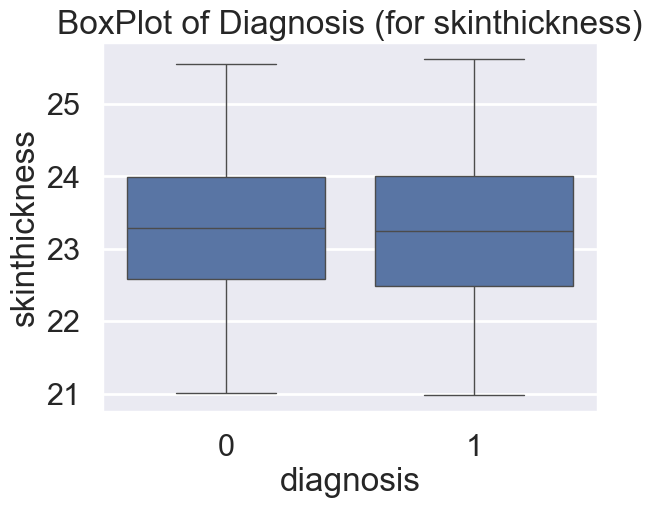

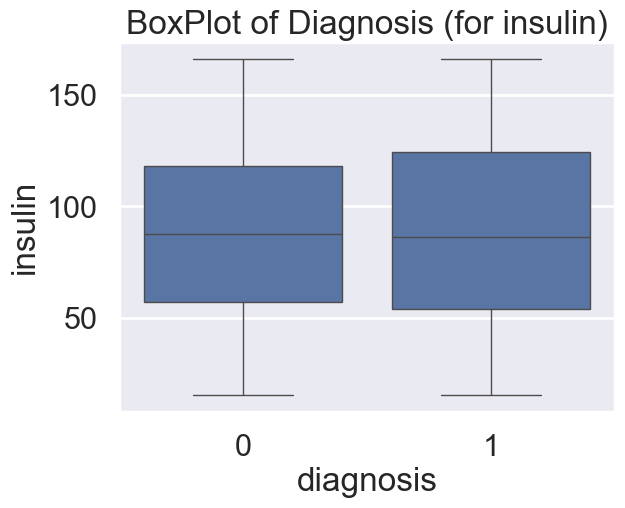

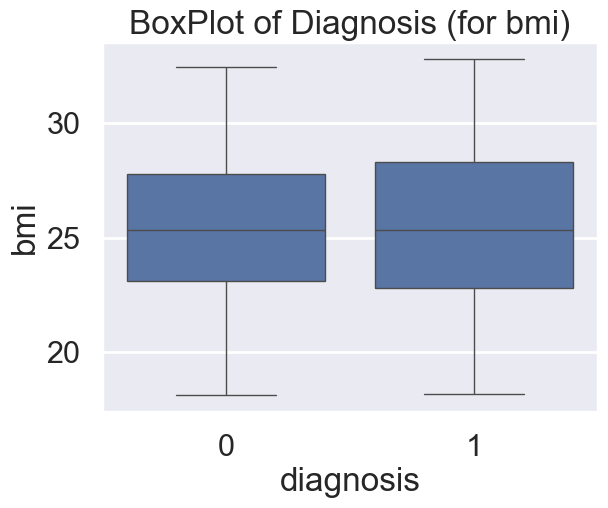

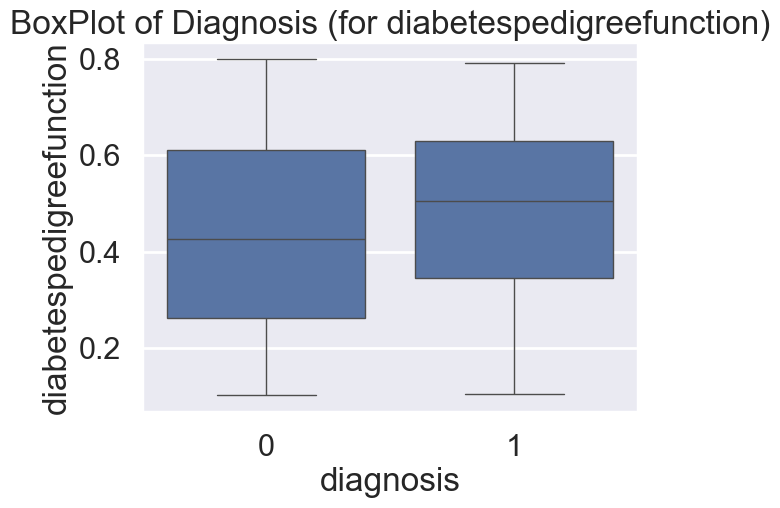

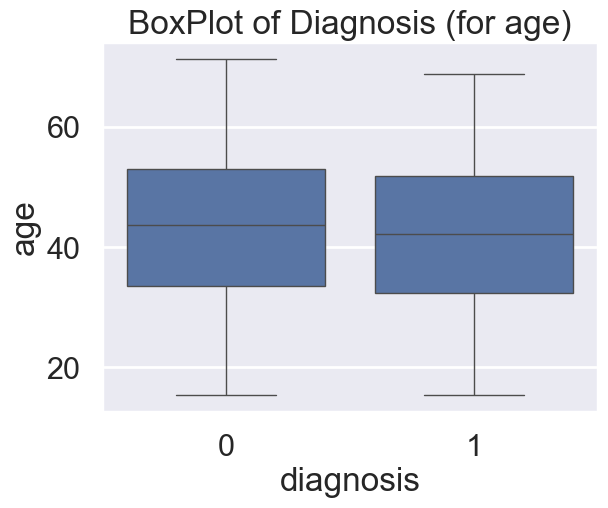

In [35]:
cols = ['glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']

for i in cols:
    sns.boxplot(x=df['diagnosis'], y=df[i], data=df)
    plt.title(f'BoxPlot of Diagnosis (for {i})')
    plt.ylabel(f'{i}')
    plt.show()

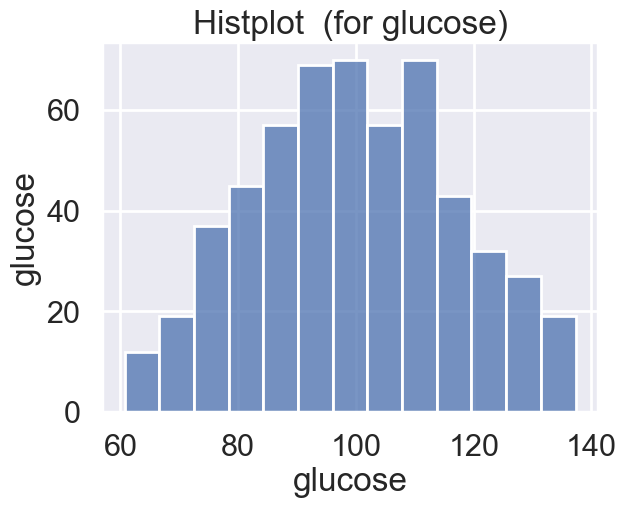

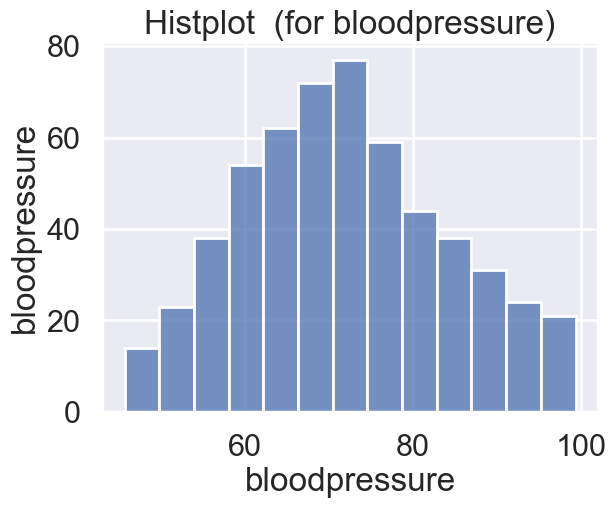

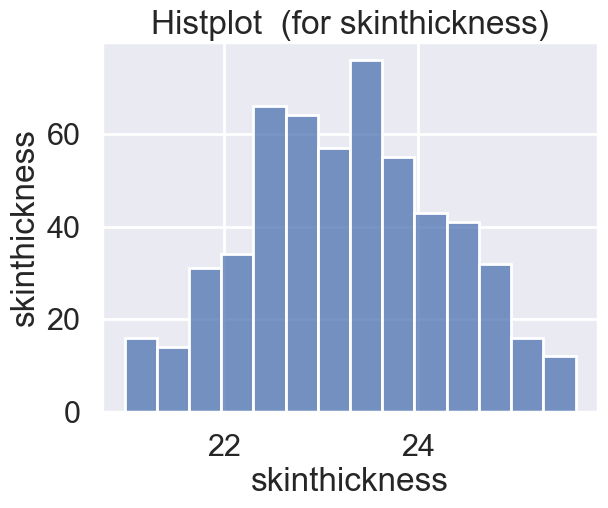

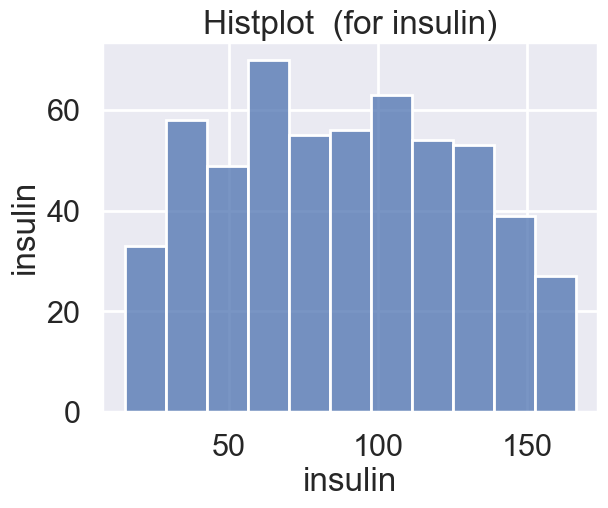

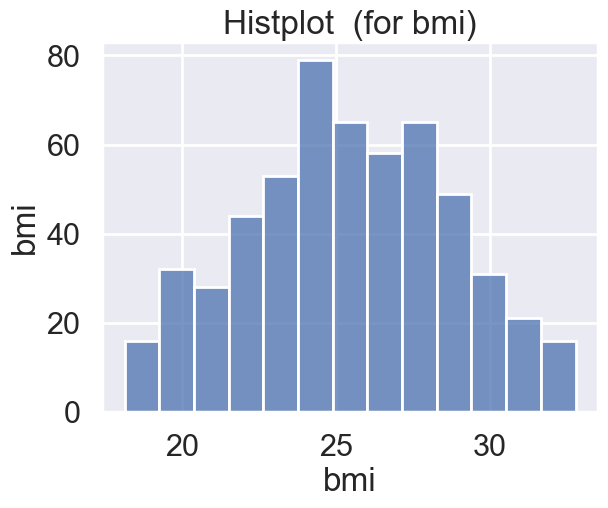

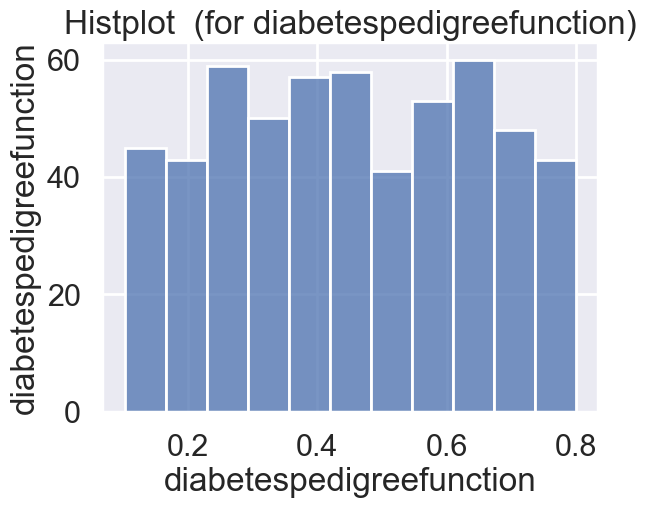

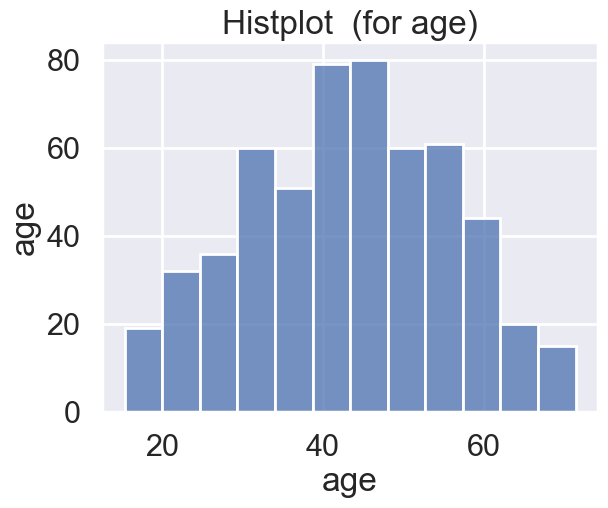

In [36]:
for i in cols:
    sns.histplot(x=df[i])
    plt.title(f'Histplot  (for {i})')
    plt.ylabel(f'{i}')
    plt.show()

In [37]:
df.head()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diagnosis
0,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
5,108.870034,74.338518,25.390851,78.704740,20.008180,0.673117,24.893761,0
6,95.665270,54.157100,23.927648,130.989859,29.235840,0.461786,18.669086,1


In [38]:
for col in df.columns:
    df[col] = np.round(df[col],3)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diagnosis
0,86.412,72.485,24.382,96.041,30.109,0.458,65.648,0
1,103.038,69.715,22.909,142.226,29.213,0.195,32.099,0
2,110.974,81.288,22.489,158.516,23.762,0.710,61.743,0
3,102.507,97.291,24.178,56.626,25.262,0.143,49.710,0
4,123.790,50.252,23.452,76.810,29.979,0.616,58.942,1


In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [40]:
X = df.drop('diagnosis',axis=1)
y = df.diagnosis

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()

In [41]:
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=250)
rfe = RFE(model)
values = rfe.fit(X,y)
print(f"Selected features: {values.support_}")

Selected features: [False False False False  True  True  True]


In [42]:
X_log = X.drop(['glucose','bloodpressure','skinthickness','insulin'],axis=1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.25, random_state=42)
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

model.fit(X_train_log,y_train_log)
pred = model.predict(X_test_log)
print(accuracy_score(y_test_log,pred))

0.7357142857142858


In [43]:
forest = RandomForestClassifier()
rfe2 = RFE(forest)
values2 = rfe2.fit(X,y)
print(f"Selected features: {values2.support_}")

Selected features: [False False  True False  True  True False]


In [44]:
X_forest = X.drop(['glucose','bloodpressure','insulin','bmi'],axis=1)
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X_forest, y, test_size=0.25, random_state=42)
X_train_forest = scaler.fit_transform(X_train_forest)
X_test_forest = scaler.transform(X_test_forest)

forest.fit(X_train_forest,y_train_forest)
y_pred = forest.predict(X_test_forest)
print(accuracy_score(y_test_forest,y_pred))

0.6571428571428571


In [45]:
xgb = XGBClassifier()
rfe4 = RFE(xgb)
values4 = rfe4.fit(X,y)
print(f"Selected features: {values4.support_}")

Selected features: [False False  True False  True  True False]


In [46]:
X_xgb = X.drop(['glucose','bloodpressure','insulin','age'],axis=1)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y, test_size=0.25, random_state=42)
X_train_xgb = scaler.fit_transform(X_train_xgb)
X_test_xgb = scaler.transform(X_test_xgb)

xgb.fit(X_train_xgb,y_train_xgb)
y_prediction = xgb.predict(X_test_xgb)
print(accuracy_score(y_test_xgb,y_prediction))

0.6571428571428571


### Logistic regression has the highest accuracy with values(BMI,diabetespedigreefunction,age)

In [46]:
import pickle
data = {'model':model,'scaler':scaler}
with open('diabetes.pkl','wb') as file:
    pickle.dump(data,file)